In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
dat=pd.read_csv('/content/conductivity_data.csv')
dat

,SiO2,CaO,K2O,Li2O,PbO,Na2O,MnO,Al2O3,MgO,T_K,log(T*cond),log(cond),Cond_S_m,Tm,Odd,Above TM?
0,70.00,0.0,22.5,3.25,0.00,3.75,0.0,0.0,0.0,723.0,0.979138,-1.880000,0.013183,0.00000,1,1
1,70.00,0.0,22.5,3.25,0.00,3.75,0.0,0.0,0.0,748.0,1.293902,-1.580000,0.026303,0.00000,1,1
2,70.00,0.0,22.5,3.25,0.00,3.75,0.0,0.0,0.0,785.0,1.804870,-1.090000,0.081283,0.00000,1,1
3,70.00,0.0,22.5,3.25,0.00,3.75,0.0,0.0,0.0,816.0,2.151690,-0.760000,0.173780,0.00000,1,1
4,70.00,0.0,22.5,3.25,0.00,3.75,0.0,0.0,0.0,873.0,2.691014,-0.250000,0.562341,0.00000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,61.06,0.0,0.0,0.00,18.27,20.77,0.0,0.0,0.0,1373.0,4.728735,1.591065,39.000000,737.95263,0,1
9315,61.06,0.0,0.0,0.00,18.27,20.77,0.0,0.0,0.0,1423.0,4.830812,1.677607,47.600000,737.95263,0,1
9316,61.06,0.0,0.0,0.00,18.27,20.77,0.0,0.0,0.0,1473.0,4.910928,1.742725,55.300000,737.95263,0,1
9317,61.06,0.0,0.0,0.00,18.27,20.77,0.0,0.0,0.0,1523.0,4.991586,1.808886,64.400000,737.95263,0,1


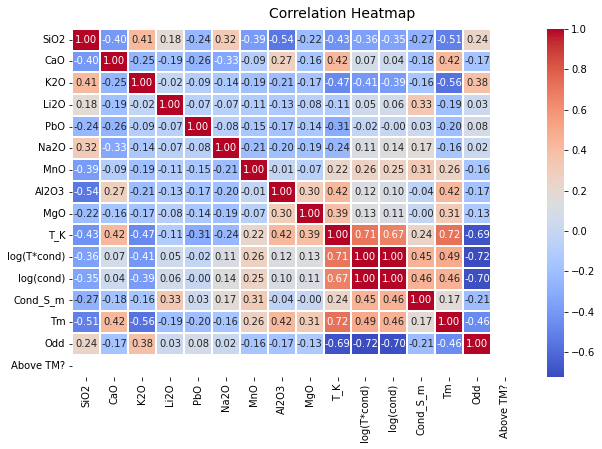

In [ ]:
# heatmap showing relation between different variables
f, ax = plt.subplots(figsize=(10, 6))
corr = dat.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

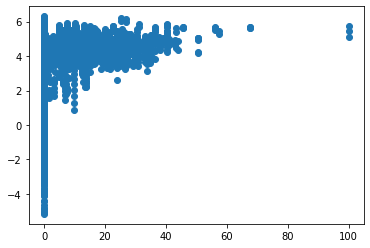

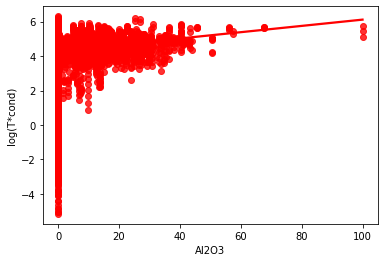

In [ ]:
#scatter plot showing relationship between each indepenedent variable with dependent variable
plt.scatter(dat["Al2O3"],dat["log(T*cond)"])
plt.show()
sns.regplot(x=dat["Al2O3"],y=dat["log(T*cond)"],ci=None,color ='red');

In [ ]:
x=dat.iloc[:,0:11]
y=dat.iloc[:,12]
#x contains independent variable and y contain column of log(T*cond)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error

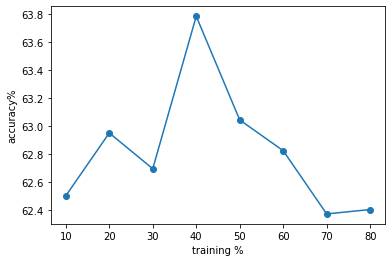

In [ ]:
#analysing accuracy level achieved with different percentage of train-test split at linear regression
t=[]
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(i*10)/100,random_state=0)
 reg=LinearRegression()
 reg.fit(x_train,y_train)
 y_pred=reg.predict(x_test)
 acc=r2_score(y_test,y_pred)*100
 t.append(acc)
t
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()
#model.intercept_
#
#print("intercept is",model.intercept_)
#print("slope is",model.coef_)
#y_pred2=model.intercept_+np.sum(model.coef_*x_train,axis=1)
#y_pred2

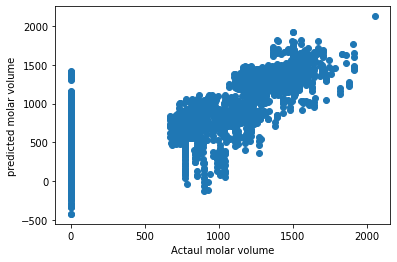

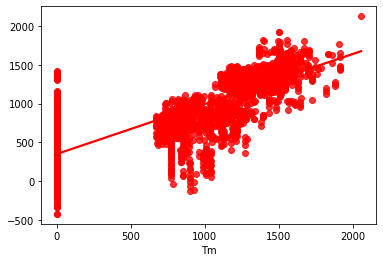

In [ ]:
# as max ccuracy at 50% training,so let us work more with this trainig set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(4*10)/100,random_state=0)
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
plt.scatter(y_test,y_pred)
plt.xlabel("Actaul molar volume")
plt.ylabel("predicted molar volume")
plt.show()
#regression plot showing accuracy of model
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


37.26804387685709


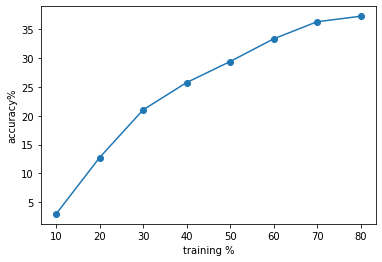

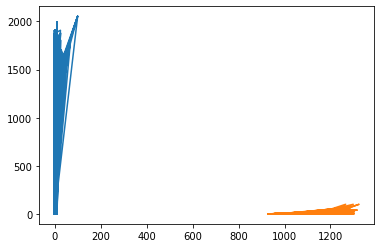

Accurcay by svm -31.590863701196376


1788     0.00
7671     0.00
2284     6.18
2016     0.00
5506     0.00
        ...  
7155     0.00
1010     0.00
7979     0.00
1627     0.00
2461    12.50
Name: Al2O3, Length: 7456, dtype: float64

In [ ]:
from sklearn.svm import SVR
t=[]
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=(i*10)/100,random_state=0)
 reg=SVR(kernel='rbf')
 reg.fit(x_train,y_train)
 y_pred=reg.predict(x_test)
 acc=r2_score(y_test,y_pred)*100
 t.append(acc)
t
print(np.max(t))
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(80)/100,random_state=0)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 
plt.plot(x_test["Al2O3"],y_test,label="test value")
plt.plot(y_pred,x_test["Al2O3"],label="predicted value")
plt.show()
print("Accurcay by svm",r2_score(y_pred,y_test))
y_test.shape[0]
x_test["Al2O3"]

In [ ]:
x1=dat.iloc[:,1:9]
y1=dat.iloc[:,10:11]
y1

,Volume_cm3_mol
0,25.839897
1,26.152476
2,26.472711
3,25.432881
4,24.936387
...,...
2688,28.426439
2689,30.052526
2690,29.121565
2691,29.890063


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(40)/100,random_state=0)
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * RBF(length_scale=0.955)

/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.9/dist-packages/sklearn/

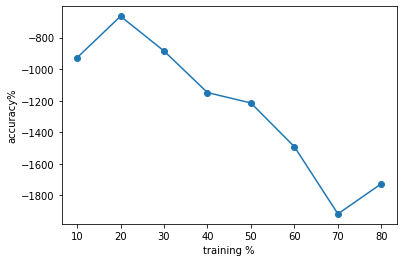

In [ ]:
t=[]
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(i*10)/100,random_state=0)
 #sc=StandardScaler()
 #x_train=sc.fit_transform(x_train)
 gauss=GaussianProcessRegressor(kernel=kernel)
 gauss.fit(x_train,y_train)
 y_pred=gauss.predict(x_test)
 acc=r2_score(y_test,y_pred)*100
 t.append(acc)
t
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()
#model.intercept_
#
#print("intercept is",model.intercept_)
#print("slope is",model.coef_)
#y_pred2=model.intercept_+np.sum(model.coef_*x_train,axis=1)
#y_pred2

/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.9/dist-packages/sklearn/

Average of rmse of ecah training set 12.394777164333034


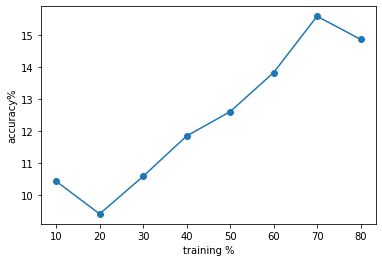

In [ ]:
t=[]
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
for i in range (1,9):
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(i*10)/100,random_state=0)
 #sc=StandardScaler()
 #x_train=sc.fit_transform(x_train)
 gauss=GaussianProcessRegressor(kernel=kernel)
 gauss.fit(x_train,y_train)
 y_pred=gauss.predict(x_test)
 mse=mean_squared_error (y_pred,y_test)
 rmse=np.sqrt(mse)
 t.append(rmse)
print("Average of rmse of ecah training set",np.mean(t))
plt.scatter(range(10,90,10),t)
plt.plot(range(10,90,10),t)
plt.xlabel("training %")
plt.ylabel("accuracy%")
plt.show()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(4*10)/100,random_state=0)
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gauss=GaussianProcessRegressor(kernel=kernel)
gauss.fit(x_train,y_train)
y_pred=gauss.predict(x_test)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


,Temperature_K
346,1723.0
1355,1873.0
1261,1777.9
1848,1573.0
352,1723.0
...,...
1185,1373.0
2133,1167.0
260,1273.0
832,1073.0
